## ch2

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right"> Initial upload: 2022.08.09 </div> 
<div style="text-align: right"> Last update: 2022.08.09</div> 

In [44]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import datetime
#import missingno as msno
import gc
import warnings; warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# Options for pandas
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [45]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

### 1. 데이터 읽기

In [46]:
user = pd.read_csv('lifelog/GB_SVC_USER_processed.csv', encoding='CP949')
step = pd.read_csv('lifelog/GB_SLEEP_HIST_processed.csv')
weather = pd.read_csv('lifelog/weather.csv')

In [47]:
step = reduce_mem_usage(step)

Memory usage of dataframe is 815.56 MB
Memory usage after optimization is: 359.34 MB
Decreased by 55.9%


In [48]:
gc.collect()

845

In [49]:
step['MSRE_BEGIN_DTM'] = step['MSRE_BEGIN_DTM'].astype('object')
step['MSRE_BEGIN_DTM'] = pd.to_datetime(step['MSRE_BEGIN_DTM'])

In [50]:
user.head()

,USER_ID,NICK_NM,USER_EMAIL,USER_NM,USER_MOBILE,BIRTHDAY,GENDER,TALL,WEIGHT,OS,APP_VER_NO,STATUS,AGE,GROUP
0,3,hhh,sangmin.han@gi-vita.io,NaN,010-5254-8226,2003-07-07,M,175.0,65.0,A,1.6.1,정상,19,youth
1,4,유히,yuhee.park@gi-vita.io,NaN,010-4187-7998,2005-11-30,F,168.0,57.0,A,1.5.7,정상,17,youth
2,7,채효,ks960427@gmail.com,NaN,010-8971-6536,1969-09-17,M,183.7,85.4,A,1.6.32,정상,53,adult
3,10,hamin,khm0651@naver.com,NaN,010-4938-0651,2003-01-01,M,178.8,72.2,A,1.6.32,정상,19,youth
4,11,korea5214,korea5214@gmail.com,NaN,010-4065-4685,2003-04-19,M,177.0,79.5,A,1.0.2,정상,19,youth


In [51]:
step.head()

,MSRE_BEGIN_DTM,USER_ID,DVIC_TP,STEP_CNT,MOVE_DIST,CNPT_CALR,MOVE_SPEED
0,2022-02-01,262,360003,11,8.06000,0.530000,1.111111
1,2022-02-01,294,360003,25,17.83375,0.909395,1.176433
2,2022-02-01,325,360003,10,6.30000,0.330000,0.805556
3,2022-02-01,342,360003,33,23.43000,1.700000,1.083333
4,2022-02-01,372,360003,14,10.16000,0.500000,1.444444


In [52]:
weather.head()

,location_no,datetime,temp,temp_qc,rain,rain_qc,wind,wind_qc,wind_d,wind_d_qc,humidity,humidity_qc,snow,cloud
0,108,2022-02-01 0:00,0.4,NaN,1.2,NaN,1.8,NaN,270,NaN,92,NaN,1.8,9
1,108,2022-02-01 1:00,-0.2,NaN,NaN,NaN,2.9,NaN,250,NaN,85,NaN,1.8,2
2,108,2022-02-01 2:00,-0.9,NaN,NaN,NaN,2.8,NaN,250,NaN,74,NaN,1.7,7
3,108,2022-02-01 3:00,-0.9,NaN,0.0,NaN,3.6,NaN,250,NaN,72,NaN,1.7,9
4,108,2022-02-01 4:00,-1.7,NaN,NaN,9.0,3.1,NaN,270,NaN,87,NaN,2.0,10


In [53]:
weather['datetime'] = pd.to_datetime(weather['datetime'])

날씨 데이터 살펴보기

<AxesSubplot:xlabel='datetime'>

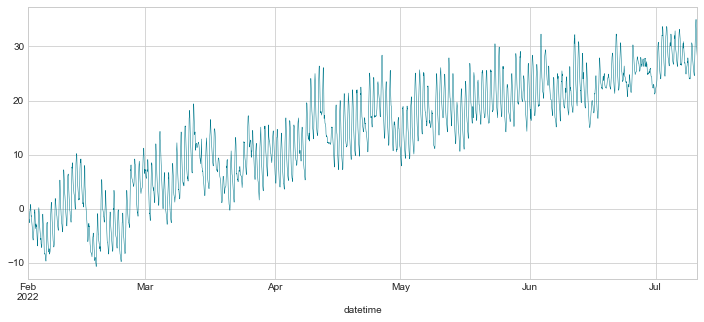

In [54]:
weather.set_index('datetime')['temp'].plot(figsize = (12, 5), linewidth = 0.5, color=colors)

<AxesSubplot:xlabel='datetime'>

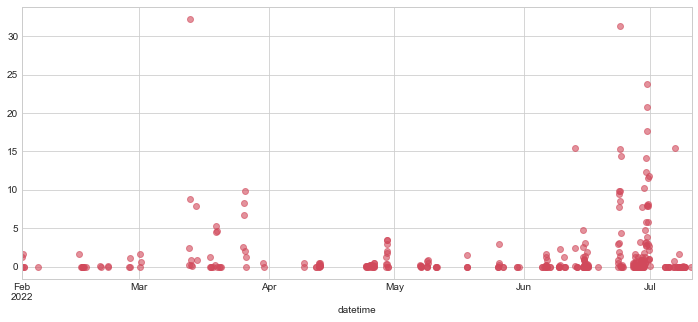

In [55]:
weather.set_index('datetime')['rain'].plot(figsize = (12, 5), linewidth = 0.5, color=colors[1], style = 'o', alpha = 0.6)

<AxesSubplot:xlabel='datetime'>

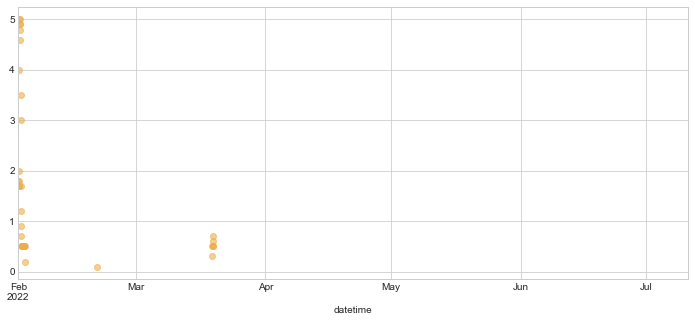

In [56]:
weather.set_index('datetime')['snow'].plot(figsize = (12, 5), linewidth = 0.5, color=colors[2], style = 'o', alpha = 0.6)

<AxesSubplot:xlabel='datetime'>

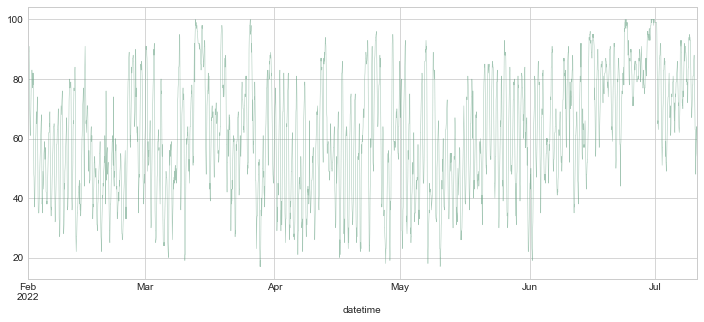

In [57]:
weather.set_index('datetime')['humidity'].plot(figsize = (12, 5), linewidth = 0.5, color=colors[3], alpha = 0.6)

날씨데이터 전처리

In [90]:
weather = weather[['datetime', 'temp', 'rain', 'wind', 'wind_d', 'humidity', 'snow', 'cloud']]

In [91]:
weather['rain'].isnull().sum()

3495

In [92]:
weather = weather.fillna(0)

개인정보와 걸음 데이터 병합

In [59]:
step = step.merge(user, on='USER_ID', how='left')

In [60]:
step.head()

,MSRE_BEGIN_DTM,USER_ID,DVIC_TP,STEP_CNT,MOVE_DIST,CNPT_CALR,MOVE_SPEED,NICK_NM,USER_EMAIL,USER_NM,USER_MOBILE,BIRTHDAY,GENDER,TALL,WEIGHT,OS,APP_VER_NO,STATUS,AGE,GROUP
0,2022-02-01,262,360003,11,8.06000,0.530000,1.111111,이본영,bon3926@hanmail.net,NaN,01033535580,1979-04-19,M,184.0,81.0,A,1.6.2,정상,43.0,adult
1,2022-02-01,294,360003,25,17.83375,0.909395,1.176433,건강한,wwkdtod@naver.com,NaN,010-3432-5599,1981-04-02,M,178.0,80.0,A,1.6.19,정상,41.0,adult
2,2022-02-01,325,360003,10,6.30000,0.330000,0.805556,매니니,mani24680@naver.com,NaN,010-3927-5462,1994-01-22,F,161.0,58.0,A,1.6.19,정상,28.0,adult
3,2022-02-01,342,360003,33,23.43000,1.700000,1.083333,Jay,ghjw75@gmail.com,NaN,010-6726-5046,1975-06-22,M,177.0,80.0,A,1.6.19,정상,47.0,adult
4,2022-02-01,372,360003,14,10.16000,0.500000,1.444444,오묘한자매맘,deneb8597@gmail.com,Hanna,010-4182-3990,1985-12-11,F,163.0,79.4,Android,1.6.2,정상,37.0,adult


In [61]:
step.columns

Index(['MSRE_BEGIN_DTM', 'USER_ID', 'DVIC_TP', 'STEP_CNT', 'MOVE_DIST',
       'CNPT_CALR', 'MOVE_SPEED', 'NICK_NM', 'USER_EMAIL', 'USER_NM',
       'USER_MOBILE', 'BIRTHDAY', 'GENDER', 'TALL', 'WEIGHT', 'OS',
       'APP_VER_NO', 'STATUS', 'AGE', 'GROUP'],
      dtype='object')

In [62]:
step = step[['MSRE_BEGIN_DTM', 'USER_ID', 'DVIC_TP', 'STEP_CNT', 'MOVE_DIST', 'CNPT_CALR', 'MOVE_SPEED','GENDER', 'AGE', 'GROUP']]

In [63]:
step.head()

,MSRE_BEGIN_DTM,USER_ID,DVIC_TP,STEP_CNT,MOVE_DIST,CNPT_CALR,MOVE_SPEED,GENDER,AGE,GROUP
0,2022-02-01,262,360003,11,8.06000,0.530000,1.111111,M,43.0,adult
1,2022-02-01,294,360003,25,17.83375,0.909395,1.176433,M,41.0,adult
2,2022-02-01,325,360003,10,6.30000,0.330000,0.805556,F,28.0,adult
3,2022-02-01,342,360003,33,23.43000,1.700000,1.083333,M,47.0,adult
4,2022-02-01,372,360003,14,10.16000,0.500000,1.444444,F,37.0,adult


In [64]:
step.to_csv('lifelog/step_total.csv', index= False)

In [66]:
step[step['GROUP']=='youth'].to_csv('lifelog/step_youth.csv')

In [68]:
step[step['GROUP']=='adult'].to_csv('lifelog/step_adult.csv')

In [70]:
step[step['GROUP']=='eldery'].to_csv('lifelog/step_eldery.csv')

In [71]:
step_total = pd.DataFrame()
step_youth = pd.DataFrame()
step_adult = pd.DataFrame()
step_eldery = pd.DataFrame()

In [72]:
step_total[['timestamp', 'STEP_CNT']] = step.set_index('MSRE_BEGIN_DTM').resample('H').sum()['STEP_CNT'].reset_index()
step_youth[['timestamp', 'STEP_CNT']] = step[step['GROUP']=='youth'].set_index('MSRE_BEGIN_DTM').resample('H').sum()['STEP_CNT'].reset_index()
step_adult[['timestamp', 'STEP_CNT']] = step[step['GROUP']=='adult'].set_index('MSRE_BEGIN_DTM').resample('H').sum()['STEP_CNT'].reset_index()
step_eldery[['timestamp', 'STEP_CNT']] = step[step['GROUP']=='eldery'].set_index('MSRE_BEGIN_DTM').resample('H').sum()['STEP_CNT'].reset_index()

In [73]:
step_total['users'] = step.set_index('MSRE_BEGIN_DTM').resample('H').count()['USER_ID'].values
step_youth['users'] = step[step['GROUP']=='youth'].set_index('MSRE_BEGIN_DTM').resample('H').count()['USER_ID'].values
step_adult['users'] = step[step['GROUP']=='adult'].set_index('MSRE_BEGIN_DTM').resample('H').count()['USER_ID'].values
step_eldery['users'] = step[step['GROUP']=='eldery'].set_index('MSRE_BEGIN_DTM').resample('H').count()['USER_ID'].values

In [74]:
step_total['year'] = step_total['timestamp'].dt.year
step_total['month'] = step_total['timestamp'].dt.month
step_total['day'] = step_total['timestamp'].dt.day
step_total['hour'] = step_total['timestamp'].dt.hour
step_total['dayofweek'] = step_total['timestamp'].dt.dayofweek #월0, 화1 ...일6

In [75]:
step_youth['year'] = step_youth['timestamp'].dt.year
step_youth['month'] = step_youth['timestamp'].dt.month
step_youth['day'] = step_youth['timestamp'].dt.day
step_youth['hour'] = step_youth['timestamp'].dt.hour
step_youth['dayofweek'] = step_youth['timestamp'].dt.dayofweek #월0, 화1 ...일6

In [76]:
step_adult['year'] = step_adult['timestamp'].dt.year
step_adult['month'] = step_adult['timestamp'].dt.month
step_adult['day'] = step_adult['timestamp'].dt.day
step_adult['hour'] = step_adult['timestamp'].dt.hour
step_adult['dayofweek'] = step_adult['timestamp'].dt.dayofweek #월0, 화1 ...일6

In [77]:
step_eldery['year'] = step_eldery['timestamp'].dt.year
step_eldery['month'] = step_eldery['timestamp'].dt.month
step_eldery['day'] = step_eldery['timestamp'].dt.day
step_eldery['hour'] = step_eldery['timestamp'].dt.hour
step_eldery['dayofweek'] = step_eldery['timestamp'].dt.dayofweek #월0, 화1 ...일6

In [82]:
def season(month):
    if month in [3, 4, 5]:
        return 1
    if month in [6, 7, 8]:
        return 2
    if month in [9, 10, 11]:
        return 3
    if month in [12, 1, 2]:
        return 4

In [83]:
holiday = [datetime.date(2022, 2, 1), datetime.date(2022, 2, 2), 
datetime.date(2022, 3, 1), datetime.date(2022, 3, 9),
datetime.date(2022, 5, 5), 
datetime.date(2022, 6, 1), datetime.date(2022, 6, 9)]

In [84]:
step_total['season'] = step_total['month'].apply(season)
step_total['holiday'] = 0
step_total.loc[step_total['timestamp'].dt.date.isin(holiday), 'holiday'] = 1

In [85]:
step_youth['season'] = step_youth['month'].apply(season)
step_youth['holiday'] = 0
step_youth.loc[step_youth['timestamp'].dt.date.isin(holiday), 'holiday'] = 1

In [86]:
step_adult['season'] = step_adult['month'].apply(season)
step_adult['holiday'] = 0
step_adult.loc[step_adult['timestamp'].dt.date.isin(holiday), 'holiday'] = 1

In [88]:
step_eldery['season'] = step_eldery['month'].apply(season)
step_eldery['holiday'] = 0
step_eldery.loc[step_eldery['timestamp'].dt.date.isin(holiday), 'holiday'] = 1

In [89]:
step_total[step_total['holiday']==1]

,timestamp,STEP_CNT,users,year,month,day,hour,dayofweek,season,holiday
0,2022-02-01 00:00:00,13107.0,528,2022,2,1,0,1,4,1
1,2022-02-01 01:00:00,9079.0,322,2022,2,1,1,1,4,1
2,2022-02-01 02:00:00,3294.0,170,2022,2,1,2,1,4,1
3,2022-02-01 03:00:00,2705.0,128,2022,2,1,3,1,4,1
4,2022-02-01 04:00:00,1146.0,78,2022,2,1,4,1,4,1
...,...,...,...,...,...,...,...,...,...,...
3091,2022-06-09 19:00:00,245821.0,4705,2022,6,9,19,3,2,1
3092,2022-06-09 20:00:00,225635.0,4380,2022,6,9,20,3,2,1
3093,2022-06-09 21:00:00,229877.0,4170,2022,6,9,21,3,2,1
3094,2022-06-09 22:00:00,154529.0,3001,2022,6,9,22,3,2,1


In [93]:
step_total = step_total.merge(weather, left_on='timestamp', right_on='datetime', how = 'left').drop('datetime', axis = 1)
step_youth = step_youth.merge(weather, left_on='timestamp', right_on='datetime', how = 'left').drop('datetime', axis = 1)
step_adult = step_adult.merge(weather, left_on='timestamp', right_on='datetime', how = 'left').drop('datetime', axis = 1)
step_eldery = step_eldery.merge(weather, left_on='timestamp', right_on='datetime', how = 'left').drop('datetime', axis = 1)

In [96]:
step_total['STEP_CNT'] = step_total['STEP_CNT'].astype('int64')
step_youth['STEP_CNT'] = step_youth['STEP_CNT'].astype('int64')
step_adult['STEP_CNT'] = step_adult['STEP_CNT'].astype('int64')
step_eldery['STEP_CNT'] = step_eldery['STEP_CNT'].astype('int64')

In [98]:
step_total.to_csv('lifelog/step_total_merged.csv', index = False)

In [99]:
step_youth.to_csv('lifelog/step_youth_merged.csv', index = False)

In [100]:
step_adult.to_csv('lifelog/step_adult_merged.csv', index = False)

In [101]:
step_eldery.to_csv('lifelog/step_eldery_merged.csv', index = False)